In [1]:
import pandas as pd

# Load dataset
url = "/content/hotel_bookings.csv"
df = pd.read_csv(url)

print(df.head())



          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.fillna({'children': 0, 'agent': -1, 'company': -1}, inplace=True)

In [4]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [5]:
df.drop(columns=['agent', 'company'], inplace=True, errors='ignore')


In [6]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%y', errors='coerce')

In [7]:
df.to_csv("cleaned_hotel_bookings.csv", index=False)

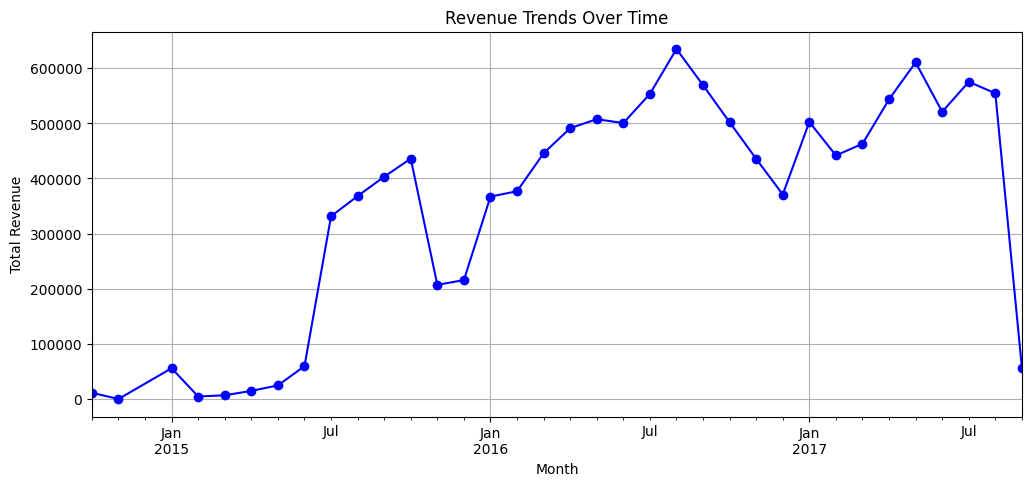

In [8]:
import matplotlib.pyplot as plt

# Compute monthly revenue
df['arrival_date'] = pd.to_datetime(df['reservation_status_date']).dt.to_period('M')
revenue_per_month = df.groupby('arrival_date')['adr'].sum()

# Plot revenue trends
plt.figure(figsize=(12, 5))
revenue_per_month.plot(kind='line', marker='o', color='blue')
plt.title('Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()


In [9]:

# Calculate cancellation percentage
cancellation_rate = df['is_canceled'].value_counts(normalize=True) * 100
print(f"Cancellation Rate: {cancellation_rate[1]:.2f}% of bookings were canceled.")


Cancellation Rate: 37.04% of bookings were canceled.


<ipython-input-10-2eaf3275be73>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_bookings.index, y=country_bookings.values, palette="viridis")


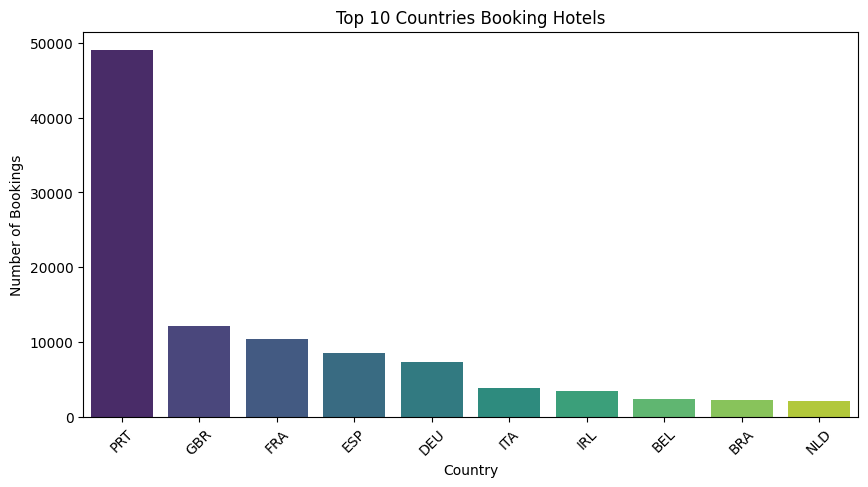

In [10]:
import seaborn as sns

# Count bookings per country
country_bookings = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=country_bookings.index, y=country_bookings.values, palette="viridis")
plt.title("Top 10 Countries Booking Hotels")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


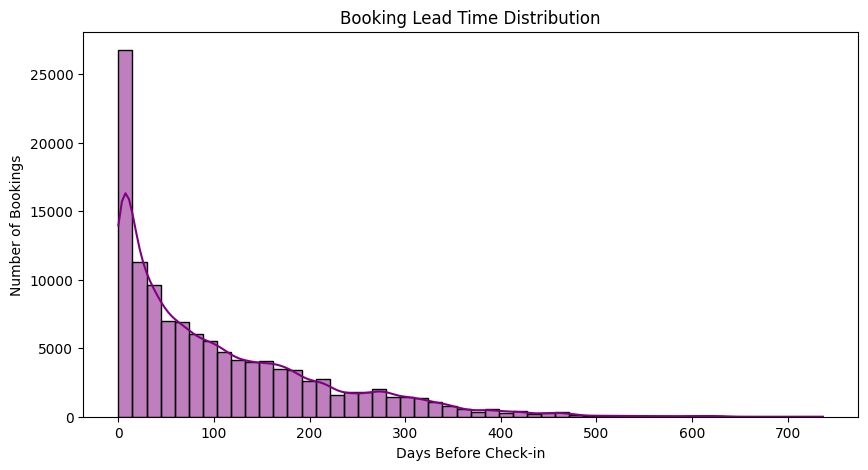

In [11]:
# Plot booking lead time
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='purple')
plt.title("Booking Lead Time Distribution")
plt.xlabel("Days Before Check-in")
plt.ylabel("Number of Bookings")
plt.show()


In [12]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 56.5 MB/s eta 0:00:00


In [13]:
!pip install pandas numpy faiss-cpu fastapi uvicorn sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1

In [14]:
!pip install chromadb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 3.8 MB/s eta 0:

In [15]:
import chromadb
from sentence_transformers import SentenceTransformer

# Initialize ChromaDB
chroma_client = chromadb.PersistentClient(path="./chroma_db")
collection = chroma_client.get_or_create_collection(name="hotel_bookings")

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert booking records into embeddings
def format_booking(row):
    return f"Booking in {row['country']} on {row['arrival_date']} with price {row['adr']} and status {row['is_canceled']}"

text_data = df.apply(format_booking, axis=1).tolist()
embeddings = model.encode(text_data)

# Store embeddings in ChromaDB
for i, (text, embedding) in enumerate(zip(text_data, embeddings)):
    collection.add(ids=[str(i)], embeddings=[embedding.tolist()], metadatas=[{"text": text}])

print("✅ Bookings Indexed in ChromaDB!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Bookings Indexed in ChromaDB!


In [18]:
def retrieve_relevant_bookings(question, top_k=3):
    query_embedding = model.encode([question]).tolist()
    results = collection.query(query_embeddings=query_embedding, n_results=top_k)

    # Handle case where no results are found
    if not results["metadatas"] or len(results["metadatas"][0]) == 0:
        return "No relevant booking records found in the dataset."

    retrieved_texts = [match["text"] for match in results["metadatas"][0]]
    return "\n".join(retrieved_texts)

In [19]:
def compute_analytics(df):
    analytics = {}

    # Top 10 countries with most cancellations
    cancellations = df[df['is_canceled'] == 1]['country'].value_counts().head(10)
    analytics['cancellations'] = f"\nTop 10 Countries with Highest Booking Cancellations:\n{cancellations.to_string()}\n"

    # Revenue trends over time
    revenue_over_time = df[df['is_canceled'] == 0].groupby('arrival_date')['adr'].sum()
    analytics['revenue'] = f"\nRevenue Trends Over Time:\n{revenue_over_time.to_string()}\n"

    # Average price (ADR)
    analytics['avg_price'] = f"\nAverage Price:\nAverage price (ADR): {df['adr'].mean():.2f}\n"

    # Lead time distribution
    analytics['lead_time'] = f"\nLead Time Statistics:\n{df['lead_time'].describe().to_string()}\n"
    # ✅ Ensure 'arrival_date' exists
    df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-1')

    # Geographical distribution
    geo_distribution = df['country'].value_counts().head(10)
    analytics['geo_distribution'] = f"\nGeographical Distribution of Bookings:\n{geo_distribution.to_string()}\n"

    return analytics

# Run analytics
analytics = compute_analytics(df)


In [24]:
import requests
import json

# LLaMA 3 API Setup
API_KEY = "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"  # Replace with your actual API key
URL = "https://openrouter.ai/api/v1/chat/completions"
HEADERS = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}
def ask_question_with_chromadb(question: str):
    question_lower = question.lower()

    #  Step 1: Compute dataset analytics once
    analytics = compute_analytics(df)

    #  Step 2: Check if the question matches any dataset analytics
    for key, value in analytics.items():
        if key in question_lower:
            print(f" Answering from dataset analytics: {key}")
            return value  # Return dataset-based answer

    #  Step 3: Retrieve relevant bookings from ChromaDB
    retrieved_data = retrieve_relevant_bookings(question)

    #  Step 4: If no relevant data is found, return a fallback message
    if not retrieved_data:
        return "I couldn't find relevant information in the dataset. Please ask a different question."

    #  Step 5: Construct prompt and send to LLaMA 3
    full_prompt = f"Context:\n{retrieved_data}\n\nUser Question: {question}"

    data = {
        "model": "meta-llama/llama-3-8b-instruct",
        "messages": [{"role": "user", "content": full_prompt}]
    }
    response = requests.post(URL, headers=HEADERS, data=json.dumps(data))

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error {response.status_code}: {response.text}"





In [21]:
def ask_question_with_chromadb(question: str):
    question_lower = question.lower()
    analytics = compute_analytics(df)

    #  If question matches analytics, return dataset-based answer
    for key, value in analytics.items():
        if key in question_lower:
            print(f" Answering from dataset analytics: {key}")
            return value

    # Retrieve relevant bookings from ChromaDB
    retrieved_data = retrieve_relevant_bookings(question)

    # If ChromaDB fails, return dataset response instead of LLaMA 3
    if "No relevant booking records found" in retrieved_data:
        return "I couldn't find relevant dataset information. Try a different question."

    #  Fix LLaMA 3 prompt to avoid SQL generation
    full_prompt = f"Here is relevant booking data:\n{retrieved_data}\n\nNow answer the question directly. Do NOT generate SQL."

    data = {
        "model": "meta-llama/llama-3-8b-instruct",
        "messages": [{"role": "user", "content": full_prompt}]
    }
    response = requests.post(URL, headers=HEADERS, data=json.dumps(data))

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error {response.status_code}: {response.text}"


In [22]:
print(ask_question_with_chromadb("What is the most common country for repeated guests?"))

Based on the booking data, what can be concluded?

* There were bookings made in April (2017-04) and May (2017-05) in AUS.
* For both months, the price was the same (130.5).
* There was only one unique price for AUS bookings in April (130.5).

Note: The booking with price 273.0 and status 1 was made in May, indicating that there was more than one booking with different prices.


In [26]:
print(ask_question_with_chromadb(""))
Which locations had the highest cancellations?

 Answering from dataset analytics: cancellations

Top 10 Countries with Highest Booking Cancellations:
country
PRT    27586
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474



In [27]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.4 MB/s eta 0:00:00


In [29]:
import gradio as gr

chat_history = []

def ask_question(question):
    answer = ask_question_with_chromadb(question)
    chat_history.append((question, answer))
    return answer

def show_history():
    return "\n".join([f"Q: {q}\nA: {a}\n" for q, a in chat_history])

with gr.Blocks() as demo:
    gr.Markdown("# Hotel Booking Query System")
    with gr.Row():
        query_input = gr.Textbox(label="Enter your question")
        submit_btn = gr.Button("Ask")
    answer_output = gr.Textbox(label="Answer")
    history_btn = gr.Button("Show History")
    history_output = gr.Textbox(label="Chat History")

    submit_btn.click(ask_question, inputs=query_input, outputs=answer_output)
    history_btn.click(show_history, outputs=history_output)

demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://938776d56d4c7f8dc8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
